# Random Forest Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [3]:
rand_state = 1000

In [4]:
df = pd.read_csv("credit_card_clean.csv")

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Exploring the variables:

1. __ID__ : ID of each client 

2. __LIMIT_BAL__: Amount of given credit in NT dollars (includes individual and family/supplementary credit) 


3. __SEX__: Gender (1=male, 2=female)

4. __EDUCATION__: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

5. __MARRIAGE__: Marital status (1=married, 2=single, 3=others)

6. __AGE__: Age in years

7. __PAY_1__: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

8. __PAY_2__: Repayment status in August, 2005 (scale same as above)

9. __PAY_3__: Repayment status in July, 2005 (scale same as above)

10. __PAY_4__: Repayment status in June, 2005 (scale same as above)

11. __PAY_5__: Repayment status in May, 2005 (scale same as above)

12. __PAY_6__: Repayment status in April, 2005 (scale same as above)

13. __BILL_AMT1__: Amount of bill statement in September, 2005 (NT dollar)

14. __BILL_AMT2__: Amount of bill statement in August, 2005 (NT dollar)

15. __BILL_AMT3__: Amount of bill statement in July, 2005 (NT dollar)

16. __BILL_AMT4__: Amount of bill statement in June, 2005 (NT dollar)

17. __BILL_AMT5__: Amount of bill statement in May, 2005 (NT dollar)

18. __BILL_AMT6__: Amount of bill statement in April, 2005 (NT dollar)

19. __PAY_AMT1__: Amount of previous payment in September, 2005 (NT dollar)

20. __PAY_AMT2__: Amount of previous payment in August, 2005 (NT dollar)

21. __PAY_AMT3__: Amount of previous payment in July, 2005 (NT dollar)

22. __PAY_AMT4__: Amount of previous payment in June, 2005 (NT dollar)

23. __PAY_AMT5__: Amount of previous payment in May, 2005 (NT dollar)

24. __PAY_AMT6__: Amount of previous payment in April, 2005 (NT dollar)

25. __default.payment.next.month__: Default payment (1=yes, 0=no)


*Note: NT is Taiwain Dollars*





In [6]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

Looks good!
Now let's see if there are any duplicates!

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        4
MARRIAGE         3
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

---

## Encode ordinal categorical features as an integer array.

In random forest we don't need to transfer the categorical variables into dummy variables (using one-hot-encoding). However, the algorithm is not able to handel ordinal data. We should transform ordinal categorical variables into quantitative variables. 

It seems that **SEX, EDUCATION, MARRIAGE** are ordinal categotical variables and should be transformed into numerics


In [12]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [13]:
ordinal_categoricals = ["SEX", "EDUCATION", "MARRIAGE"]

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
enc = OrdinalEncoder()

In [17]:
df[ordinal_categoricals] = enc.fit_transform(df[ordinal_categoricals])

In [20]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,0.0,3.0,0.0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0.0,3.0,2.0,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [22]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['grad', 'highschool', 'other', 'university'], dtype=object),
 array(['married', 'other', 'single'], dtype=object)]

Remember, with other machine learning models, we ended up with **78 features** using the same data set because we had to transform categorical variables into dummies. But with RF, there is only **23 features** to work with. 

### Scaling features
In random forest, we don't need to scale the features!! 

In [29]:
pd.crosstab(df["DEFAULT"], df["DEFAULT"], normalize=True) * 100
# The target feature looks like relatively imbalanace.

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


### Defining the variables and splitting the data

In [31]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [32]:
y = df["DEFAULT"]
X = df.drop(columns=["DEFAULT", "ID"])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

---

## Random Forest Classification with Sklearn

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Predicting the Test set probabilites and classes
y_hat = RF_classifier.predict(X_test)
y_hat_probs = RF_classifier.predict_proba(X_test)[:, 1]

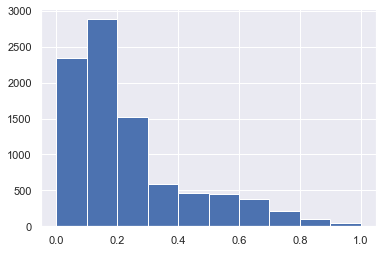

In [37]:
plt.hist(y_hat_probs);

---
## Evaluating the model performance on test data

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#### Confusion matrix

In [40]:
print(confusion_matrix(y_test, y_hat))

[[6610  401]
 [1229  760]]


#### Built-in classification report

In [41]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7011
           1       0.65      0.38      0.48      1989

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



---------------

## Tuning hyperparameters: 
### Gridsearch

In [43]:
my_param_grid = {"n_estimators" : [50, 100, 150], 
                 "criterion" : ["entropy", "gini"],
                 "max_features" : ["sqrt", "log2", None],
                 "max_depth" : [10, 20, 30]}

In [42]:
from sklearn.model_selection import GridSearchCV

In [45]:
grid = GridSearchCV(estimator = RandomForestClassifier(random_state=rand_state),
                    param_grid = my_param_grid,
                    refit = True,
                    verbose = 2,
                    cv = 5,
                    n_jobs=-1)

In [46]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1000),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [47]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'n_estimators': 100}

In [48]:
grid.best_estimator_

RandomForestClassifier(max_depth=10, max_features=None, random_state=1000)

In [49]:
y_hat_optimized = grid.predict(X_test)

#### Confusion matrix

In [50]:
print(confusion_matrix(y_test, y_hat_optimized))

[[6657  354]
 [1249  740]]


#### Built-in classification report

In [51]:
print(classification_report(y_test, y_hat_optimized))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7011
           1       0.68      0.37      0.48      1989

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.82      0.80      9000



In [53]:
# We didn't make any improvement. The reason is that the research was very limited.

## Exercise:
1. Use cross validation to estimate the accuracy in the test set.
2. Use OOB observations to estimate the accuracy in the test set.

---

##### 1. Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'n_estimators': 100}

In [64]:
R2 = cross_val_score(estimator=RandomForestClassifier(criterion="gini", max_depth=10, max_features=None, n_estimators=100),
                     X = X_train,
                     y = y_train,
                     cv = 5,
                     scoring = "r2",
                     n_jobs=-1
                     )

In [66]:
R2
# Actual Test Score.

array([-0.06010381, -0.04766452, -0.05457524, -0.03442833, -0.05514452])

##### 2. OOB(Out of bab) Errors

In [62]:
RF_oob = RandomForestClassifier(criterion="gini", max_depth=10, max_features=None, n_estimators=100, oob_score=True)
RF_oob.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=None, oob_score=True)

In [63]:
RF_oob.oob_score_

0.8168095238095238

## Dealing with imbalanced target variables!

In [69]:
pd.crosstab(df["DEFAULT"], df["DEFAULT"], normalize=True) * 100

DEFAULT,0,1
DEFAULT,,
0,77.88,0.00
1,0.00,22.12


In [72]:
RF_balanced = RandomForestClassifier(random_state = rand_state, 
                                     criterion = "gini", 
                                     max_features = None, 
                                     max_depth = 10, 
                                     class_weight = "balanced_subsample")

# Default class_weight = None
# The "balanced_subsample" mode is the same as "balanced" except that weights are computed based on 
   # the bootsrap sample for every tree grown.

In [73]:
y_hat_balanced = RF_balanced.fit(X_train, y_train).predict(X_test)

#### Confusion matrix

In [74]:
print(confusion_matrix(y_test, y_hat_balanced))

[[6060  951]
 [ 888 1101]]


#### Built-in classification report

In [75]:
print(classification_report(y_test, y_hat_balanced))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      7011
           1       0.54      0.55      0.54      1989

    accuracy                           0.80      9000
   macro avg       0.70      0.71      0.71      9000
weighted avg       0.80      0.80      0.80      9000



In [76]:
# We can assume that our data is balance and use first scores.

### ROC and AUC 

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

No Skil        : ROC AUC = 0.500
Random Forest  : ROC AUC =   1


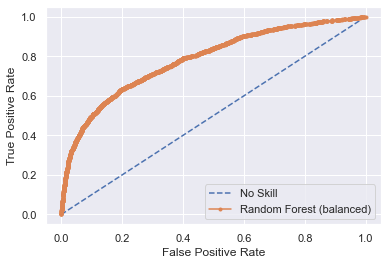

In [78]:
# Generate a no skill(ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = RF_balanced.predict_proba(X_test)[:, 1]

# Calculation scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print("No Skil        : ROC AUC = %.3f" % (ns_auc))
print("Random Forest  : ROC AUC = %3.f" % (lr_auc))

# Calculate Roc Curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Plot the Roc Curve for the Model
plt.plot(ns_fpr, ns_tpr, linestyle = "--", label = "No Skill")
plt.plot(lr_fpr, lr_tpr, marker = ".", label = "Random Forest (balanced)")

# Axis Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Show the Legend
plt.legend();

In [79]:
# Random Forest is really good at taking care of the nonlinearities

----------------

## Feature Importance

In [80]:
features = list(X_train.columns)
print(features)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [81]:
importance = RF_balanced.feature_importances_
importance

array([0.04992327, 0.00449513, 0.00813177, 0.00431807, 0.03559476,
       0.39696706, 0.01881106, 0.0154029 , 0.02568989, 0.00998634,
       0.01266514, 0.05354282, 0.03248648, 0.02592388, 0.02454457,
       0.02338883, 0.02706166, 0.03353738, 0.06240057, 0.03634559,
       0.0351731 , 0.0297901 , 0.03381963])

In [84]:
FIM = pd.DataFrame({"Features" : features, "Feature_importance" : importance})
FIM = FIM.sort_values(by="Feature_importance", ascending=False)
FIM

,Features,Feature_importance
5,PAY_1,0.396967
18,PAY_AMT2,0.062401
11,BILL_AMT1,0.053543
0,LIMIT_BAL,0.049923
19,PAY_AMT3,0.036346
4,AGE,0.035595
20,PAY_AMT4,0.035173
22,PAY_AMT6,0.033820
17,PAY_AMT1,0.033537
12,BILL_AMT2,0.032486


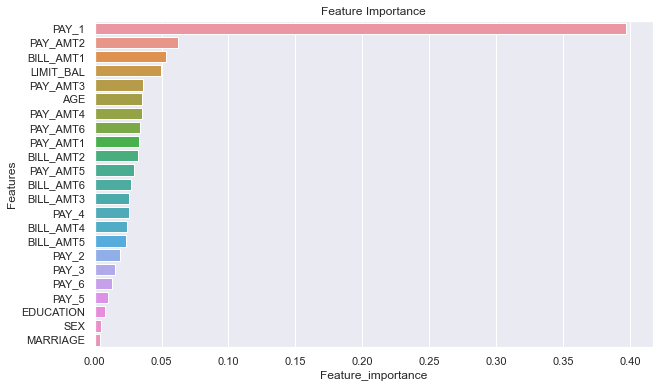

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(y = "Features", x = "Feature_importance", data=FIM)

plt.title("Feature Importance")
plt.show()

---

###  Additional links:


1. Decision Trees with sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Ensemble learning with sklearn: https://scikit-learn.org/stable/modules/ensemble.html
3. graphviz: this is used for Tree visualization: http://graphviz.org/
4. Out of Bag errors for random forest: https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py